# Linear regression


[41288.69409442]
coef=[828.46507522] intercept=-1632210.7578554575


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


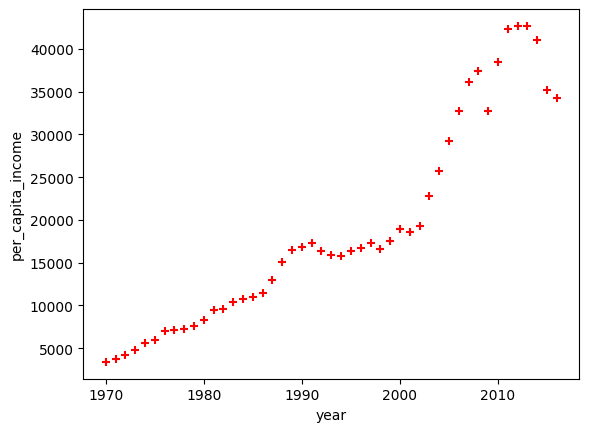

In [ ]:

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('canada_per_capita_income.csv')
df
df.rename(columns = {'per capita income (US$)':'per_capita_income'}, inplace = True)
df

plt.xlabel('year')
plt.ylabel('per_capita_income')
plt.scatter(df.year,df.per_capita_income,color='red',marker='+')

new_df = df.drop('per_capita_income',axis='columns')
new_df

per_capita_income = df.per_capita_income
per_capita_income

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,per_capita_income)


print(reg.predict([[2020]]))

print("coef="+str(reg.coef_)+" intercept="+str(reg.intercept_))




YearsExperience    2
Salary             0
dtype: int64
0
Predicted salary for 12 years of experience: 139464.47667860572
coef=[9481.29631652] intercept=25688.920880308586


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


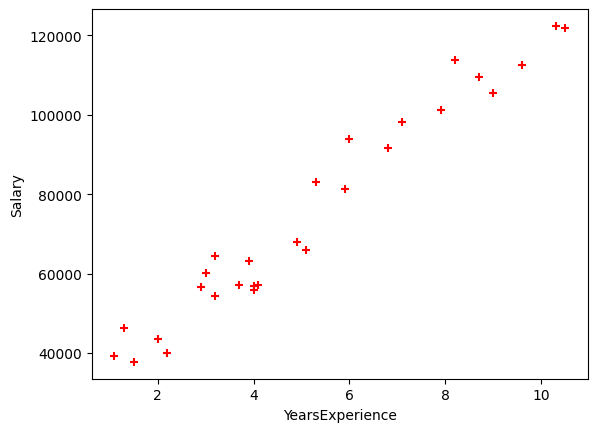

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


df = pd.read_csv('salary.csv')


plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience, df.Salary, color='red', marker='+')


Salary = df.Salary


print(df.isnull().sum())


df_copy = df.copy()

df_copy["YearsExperience"] = df_copy["YearsExperience"].interpolate()


print(df_copy["YearsExperience"].isnull().sum())
new_df = df_copy.drop('Salary', axis='columns')

reg = linear_model.LinearRegression()
reg.fit(new_df, Salary)

predicted_salary = reg.predict([[12]])
print(f"Predicted salary for 12 years of experience: {predicted_salary[0]}")
print("coef="+str(reg.coef_)+" intercept="+str(reg.intercept_))


# Multiple Regresion

<ipython-input-30-14662822b531>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].mean(), inplace=True)


Predicted Salaries:
Candidate 1: $53290.89
Candidate 2: $92268.07


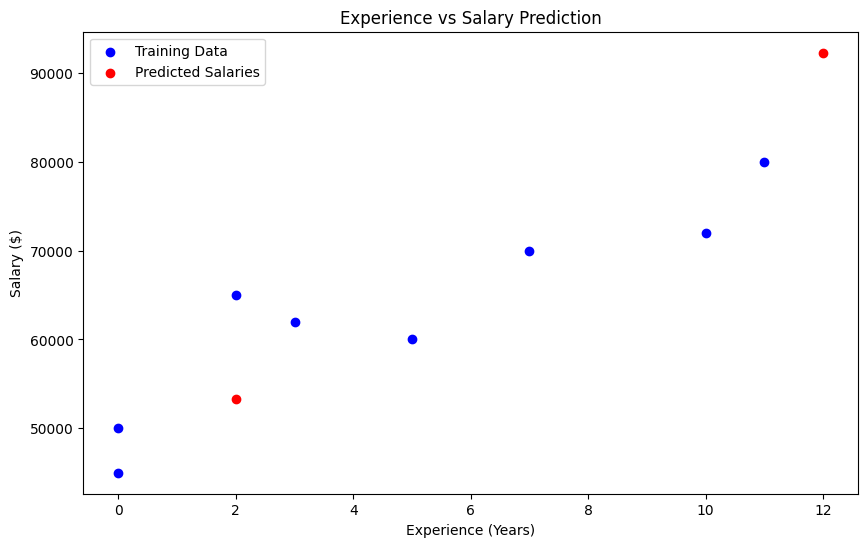

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


file_path = '/content/hiring.csv'
data = pd.read_csv(file_path)


experience_mapping = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9,
    'ten': 10, 'eleven': 11, 'twelve': 12
}

data['experience'] = data['experience'].apply(lambda x: experience_mapping.get(str(x).lower(), 0))
data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].mean(), inplace=True)


X = data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = data['salary($)']


model = LinearRegression()
model.fit(X, y)


test_candidates = pd.DataFrame([
    [2, 9, 6],
    [12, 10, 10]
], columns=['experience', 'test_score(out of 10)', 'interview_score(out of 10)'])


predicted_salaries = model.predict(test_candidates)
print("Predicted Salaries:")
for i, salary in enumerate(predicted_salaries, 1):
    print(f"Candidate {i}: ${salary:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X['experience'], y, color='blue', label='Training Data')
plt.scatter(test_candidates['experience'], predicted_salaries, color='red', label='Predicted Salaries')
plt.title('Experience vs Salary Prediction')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.legend()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


file_path = '/content/1000_Companies.csv'
data = pd.read_csv(file_path)


X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = data['Profit']

column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), ['State'])], remainder='passthrough')
X = column_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)

test_data = np.array([[0, 1, 91694.48, 515841.3, 11931.24]])


predicted_profit = model.predict(test_data)

print(f"Predicted Profit for Florida: ${predicted_profit[0]:.2f}")


Predicted Profit for Florida: $433338.95
